In [1]:
import pickle
from mapie.regression import MapieRegressor
from sklearn.neural_network import MLPRegressor
import os, sys
sys.path.append(os.path.join(os.getcwd(), '..')) # this is the ml_dadi dir
import plotting
from plotting import plot_accuracy_single
import ml_models
import numpy as np

In [24]:
# load test data and trained models
mapie_nu = pickle.load(open('data/1d_2epoch/mapie_nu', 'rb'))
mapie_T = pickle.load(open('data/1d_2epoch/mapie_T', 'rb'))
test_data = pickle.load(open('data/1d_2epoch/test_data_full_range', 'rb'))

In [29]:
# unpack test data set
i = 2
theta_list = [10000, 1000, 100]
X_test = [test_data[i][params].data.flatten()
          for params in test_data[i]]
y_test = [params for params in test_data[i]]
# separate each param
nu_test = [params[0] for params in y_test]
T_test = [params[1] for params in y_test]

In [30]:
# implementing MAPIE test
alpha = [0.05, 0.1, 0.2, 0.5, 0.7, 0.85]
# for nu
nu_pred, nu_pis = mapie_nu.predict(X_test, alpha=alpha)
# for T
T_pred, T_pis = mapie_T.predict(X_test, alpha=alpha)

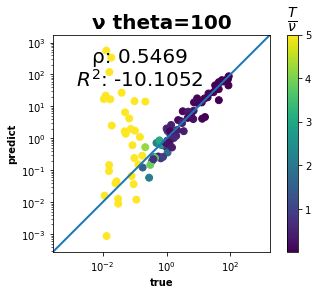

In [31]:
T_over_nu = [T/10**nu for T,nu in zip(T_test, nu_test)]
nu_test_log = [10**p_true for p_true in nu_test]
nu_pred_log = [10**p_pred for p_pred in nu_pred]
r2 = ml_models.r2(nu_test_log, nu_pred_log)[0]
rho = ml_models.rho(nu_test_log, nu_pred_log)
plot_accuracy_single(nu_test_log, nu_pred_log, x_label="true",
                         y_label="predict", size=[6, 2, 20], log=True, r2=r2, rho=rho, title = 'ν'+ ' '+ f'theta={theta_list[i]}', c=T_over_nu)

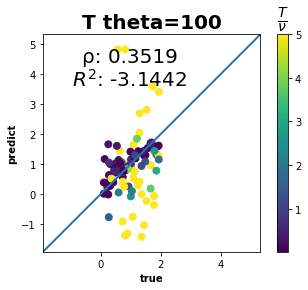

In [32]:
r2 = ml_models.r2(T_test, T_pred)[0]
rho = ml_models.rho(T_test, T_pred)
plot_accuracy_single(T_test, list(T_pred), size=[6, 2, 20], log=False, r2=r2, rho=rho, title = 'T'+ ' '+ f'theta={theta_list[i]}', c=T_over_nu)